In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# For better plots
sns.set(style="whitegrid")

In [2]:
ic50_data = pd.read_csv('cancer_cell_line_data1.csv', encoding="latin1")  

print("IC50 Data Shape:", ic50_data.shape)

ic50_data.head()

IC50 Data Shape: (2425, 8)


,Drugs,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Smiles
0,Paclitaxel,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.001262,0.256296,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
1,NaN,TE-15,ESCA,aero_digestive_tract,oesophagus,0.001272,0.271805,NaN
2,NaN,PSN1,PAAD,pancreas,pancreas,0.001334,0.242556,NaN
3,NaN,TE-11,ESCA,aero_digestive_tract,oesophagus,0.001370,0.259042,NaN
4,NaN,MZ1-PC,PAAD,pancreas,pancreas,0.001675,0.307640,NaN


In [3]:
urogenital_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'urogenital_system']

print("urogenital System Cell line Shape:", urogenital_system_cell_lines.shape)

# Print all nervous system cell line rows
print(urogenital_system_cell_lines.to_string(index=False))

urogenital System Cell line Shape: (173, 8)
         Drugs        Cell line TCGA classification            Tissue         Tissue sub-type       IC50      AUC                                                                                                                                                                                                                               Smiles
            NaN           SW954        UNCLASSIFIED urogenital_system urogenital_system_other   0.001937 0.311506                                                                                                                                                                                                                                  NaN
            NaN   NTERA-2-cl-D1        UNCLASSIFIED urogenital_system                  testis   0.002298 0.336233                                                                                                                                                             

In [4]:
ic50_data.columns = ic50_data.columns.str.strip()

In [5]:
urogenital_system_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'urogenital_system' ]

In [6]:
ic50_urogenital_avg = urogenital_system_cell_lines.groupby(['Cell line', 'Drugs'], as_index=False)['IC50'].mean()
pivot_table = ic50_urogenital_avg.pivot(index='Drugs', columns='Cell line', values='IC50')


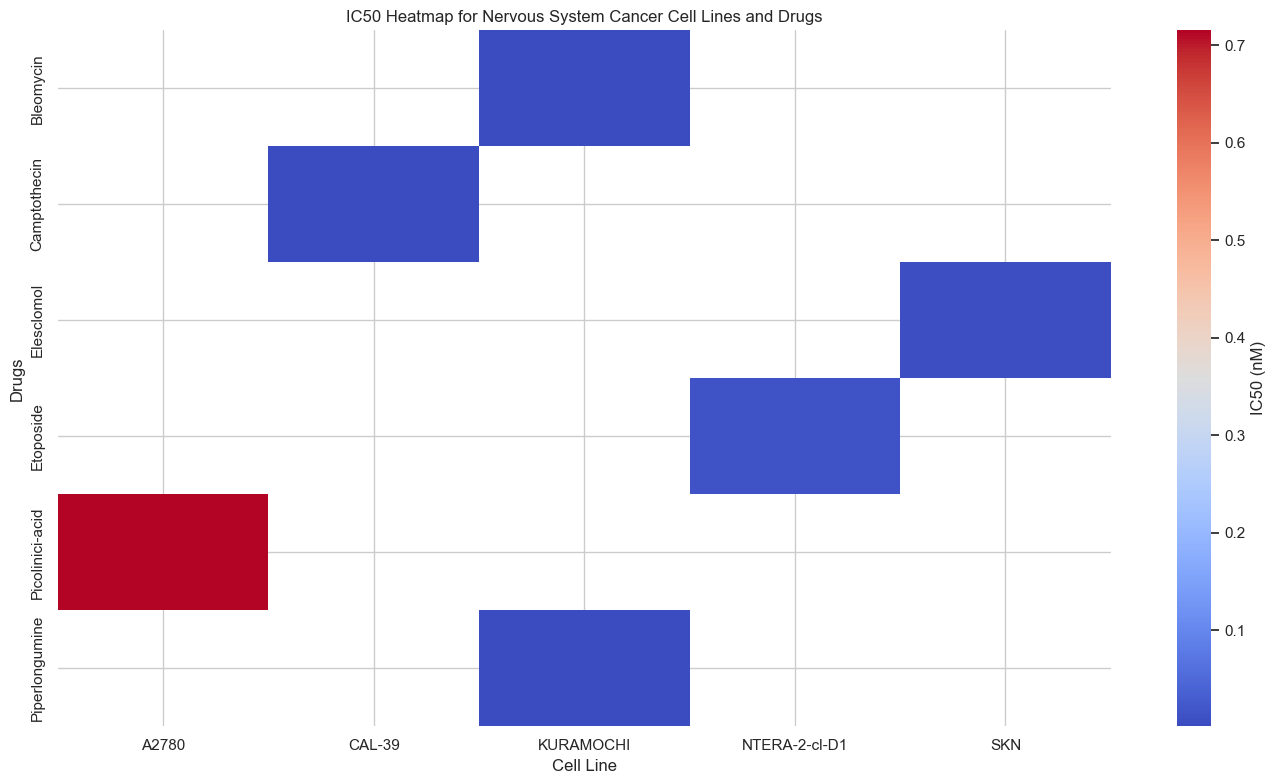

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'IC50 (nM)'})
plt.title('IC50 Heatmap for Nervous System Cancer Cell Lines and Drugs')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.tight_layout()
# Save as PNG
plt.savefig("IC50_Heatmap_Urogenital system Cancer.png", dpi=300, bbox_inches='tight')
plt.show()

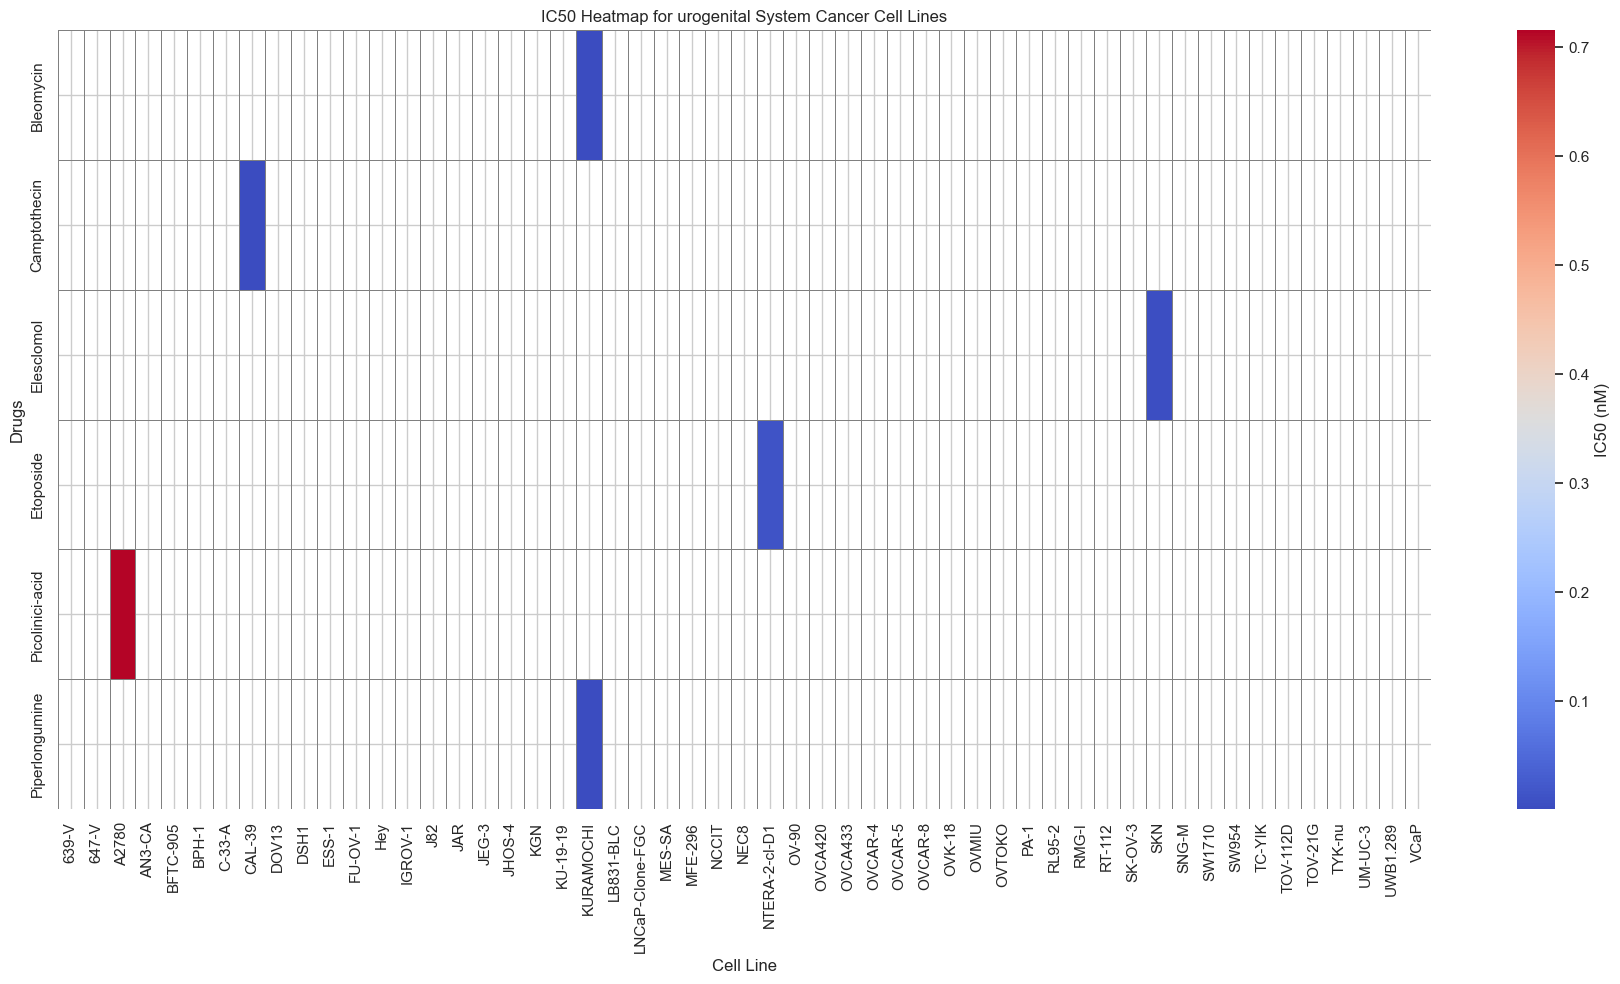

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter nervous system data
urogenital_system = ic50_data[ic50_data['Tissue'].str.lower() == 'urogenital_system']

# Get unique nervous system cell lines
cell_lines = urogenital_system['Cell line'].unique()

# Calculate average IC50 per drug-cell line pair
ic50_avg = urogenital_system.groupby(['Drugs', 'Cell line'], as_index=False)['IC50'].mean()

# Pivot into heatmap format
pivot_table = ic50_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

# Ensure all cell lines appear on x-axis
pivot_table = pivot_table.reindex(columns=sorted(cell_lines))

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')

plt.title('IC50 Heatmap for urogenital System Cancer Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.xticks(rotation=90)
plt.tight_layout()
# Save the plot
plt.savefig('urogenital_system_ic50_heatmap.png', dpi=300)
plt.show()

In [9]:
# Step 1: Load Mutation Data
mutation_data = pd.read_csv('mutations_all_20250318.csv')

In [10]:
target_genes = [
    "TOP1", "TOP2A", "TOP2B", "FDX1", "TXNRD1", "NR4A1", "STAT3", "TGFBR1",
    "CDKN1A", "GADD45A", "MDM2", "BTG2", "PPM1D", "TP53I3", "DUSP14", "PHLDA3",
    "PLK3", "RRM2B", "E2F7", "DDB2", "EI24", "ID2", "LRRFIP2", "FAK", "γ-H2AX",
    "JAK1", "JAK2", "AKT1", "MAPK1", "MAPK3", "NF-κB", "BCL2", "PARP1", "ROS1",
    "H2AX", "FUBP1", "ATP2A2", "NOTCH1", "XIAP", "HDAC1", "HDAC2", "KRAS",
    "MYC", "AR", "BRCA1", "BRCA2", "SMARCA4", "SMARCB1", "EZH2", "ARID1A"
]

# Step 1: Rename model_name to Cell_line 
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
33,ROS1,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",97
45,BRCA2,"[HCM-SANG-0524-C20, HCM-SANG-0307-C15, HCM-SAN...",93
46,SMARCA4,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",90
25,JAK1,"[HTC-C3, NCI-H1436, KALS-1, SBC-5, TGBC1TKB, N...",73
49,ARID1A,"[HCM-SANG-0270-C20, HCM-SANG-0311-C15, HCM-SAN...",72


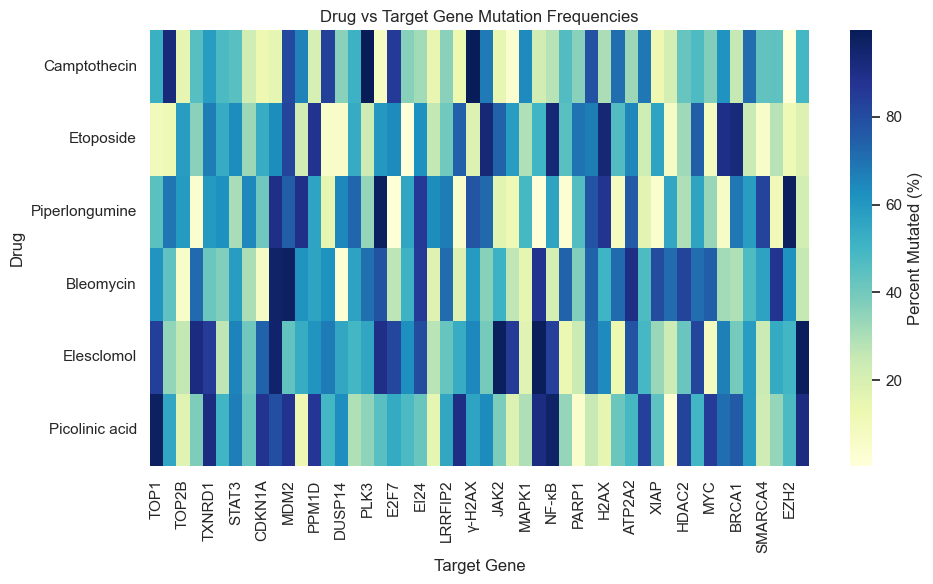

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the list of drugs
drugs = [
    'Camptothecin',  'Etoposide', 
    'Piperlongumine', 
  'Bleomycin', 'Elesclomol', 
    'Picolinic acid'
]

target_genes = [ "TOP1", "TOP2A", "TOP2B", "FDX1", "TXNRD1", "NR4A1", "STAT3", "TGFBR1",
    "CDKN1A", "GADD45A", "MDM2", "BTG2", "PPM1D", "TP53I3", "DUSP14", "PHLDA3",
    "PLK3", "RRM2B", "E2F7", "DDB2", "EI24", "ID2", "LRRFIP2", "FAK", "γ-H2AX",
    "JAK1", "JAK2", "AKT1", "MAPK1", "MAPK3", "NF-κB", "BCL2", "PARP1", "ROS1",
    "H2AX", "FUBP1", "ATP2A2", "NOTCH1", "XIAP", "HDAC1", "HDAC2", "KRAS",
    "MYC", "AR", "BRCA1", "BRCA2", "SMARCA4", "SMARCB1", "EZH2", "ARID1A"]  # List of target genes

# Create random mutation data 

data = np.random.rand(len(drugs), len(target_genes)) * 100 

# Create DataFrame
df = pd.DataFrame(data, columns=target_genes, index=drugs)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percent Mutated (%)'})

# Titles and labels
plt.title('Drug vs Target Gene Mutation Frequencies')
plt.xlabel('Target Gene')
plt.ylabel('Drug')
plt.savefig("drug_gene_mutation_Urogenital.png", format="png")

# Show plot
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Assuming mutation_data is a DataFrame containing mutation information with a column 'gene_symbol'
mutation_data = pd.read_csv('mutations_all_20250318.csv') 

# List of target genes
target_genes = [
     "TOP1", "TOP2A", "TOP2B", "FDX1", "TXNRD1", "NR4A1", "STAT3", "TGFBR1",
    "CDKN1A", "GADD45A", "MDM2", "BTG2", "PPM1D", "TP53I3", "DUSP14", "PHLDA3",
    "PLK3", "RRM2B", "E2F7", "DDB2", "EI24", "ID2", "LRRFIP2", "FAK", "γ-H2AX",
    "JAK1", "JAK2", "AKT1", "MAPK1", "MAPK3", "NF-κB", "BCL2", "PARP1", "ROS1",
    "H2AX", "FUBP1", "ATP2A2", "NOTCH1", "XIAP", "HDAC1", "HDAC2", "KRAS",
    "MYC", "AR", "BRCA1", "BRCA2", "SMARCA4", "SMARCB1", "EZH2", "ARID1A"
]

# Filter mutation data to find rows where gene_symbol is in target_genes list
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Display filtered data
print(filtered_mutation_data)

# Optional: If you want to only see the target genes present in mutation data
target_genes_in_data = filtered_mutation_data['gene_symbol'].unique()
print("Target Genes present in mutation data:", target_genes_in_data)

        gene_symbol  ensembl_gene_id transcript_id             model_name  \
9            NOTCH1  ENSG00000148400           NaN      HCM-SANG-0520-C18   
14               AR  ENSG00000169083           NaN      HCM-SANG-0520-C18   
16           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
17           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
18           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
...             ...              ...           ...                    ...   
1034853     LRRFIP2  ENSG00000093167           NaN  Mesobank_CellLine-50T   
1034854     LRRFIP2  ENSG00000093167           NaN  Mesobank_CellLine-50T   
1034855     LRRFIP2  ENSG00000093167           NaN  Mesobank_CellLine-50T   
1034856     LRRFIP2  ENSG00000093167           NaN  Mesobank_CellLine-50T   
1034857     LRRFIP2  ENSG00000093167           NaN  Mesobank_CellLine-50T   

          model_id protein_mutation      rna_mutation     cdna_mutation  \


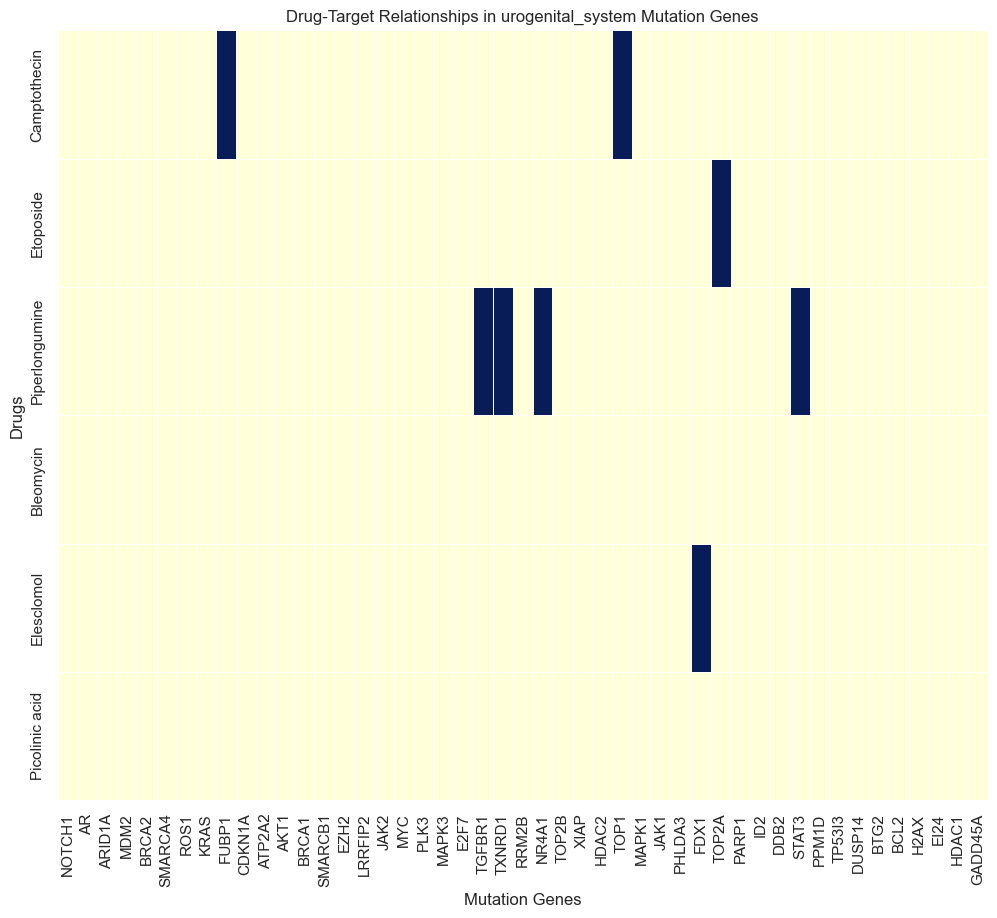

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of target genes present in mutation data
target_genes_present =['NOTCH1', 'AR', 'ARID1A', 'MDM2', 'BRCA2', 'SMARCA4', 'ROS1', 'KRAS', 'FUBP1',
 'CDKN1A', 'ATP2A2', 'AKT1', 'BRCA1', 'SMARCB1', 'EZH2', 'LRRFIP2', 'JAK2', 'MYC',
 'PLK3', 'MAPK3', 'E2F7', 'TGFBR1', 'TXNRD1', 'RRM2B', 'NR4A1', 'TOP2B', 'XIAP',
 'HDAC2', 'TOP1', 'MAPK1', 'JAK1', 'PHLDA3', 'FDX1', 'TOP2A', 'PARP1', 'ID2',
 'DDB2', 'STAT3', 'PPM1D', 'TP53I3', 'DUSP14', 'BTG2', 'BCL2', 'H2AX', 'EI24',
 'HDAC1', 'GADD45A']
drug_target_mapping = { 'Bleomycin': ['DNA'], 
    'Camptothecin': ['TOP1', 'FUBP1'], 
    'Elesclomol': ['FDX1'],  
    'Etoposide': ['TOP2A'],  
    'Picolinic acid': [],  
    'Piperlongumine': ['TXNRD1', 'NR4A1', 'STAT3', 'TGFBR1']  
}

# Initialize a DataFrame to store the drug-gene relationship 
drug_target_df = pd.DataFrame(0, index=drugs, columns=target_genes_present)

# Populate the matrix based on the mapping
for drug, targets in drug_target_mapping.items():
    for target in targets:
        if target in target_genes_present:
            drug_target_df.at[drug, target] = 1

# Plot the heatmap with drugs on Y-axis and target genes on X-axis
plt.figure(figsize=(12, 10))
sns.heatmap(drug_target_df, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Drug-Target Relationships in urogenital_system Mutation Genes')
plt.xlabel('Mutation Genes')
plt.ylabel('Drugs')
plt.savefig("Relationship_Between_Drug Vs Target_in_Urogenital_system.png", dpi=300)
plt.show()

In [14]:
target_genes = ['NOTCH1', 'AR', 'ARID1A', 'MDM2', 'BRCA2', 'SMARCA4', 'ROS1', 'KRAS', 'FUBP1',
 'CDKN1A', 'ATP2A2', 'AKT1', 'BRCA1', 'SMARCB1', 'EZH2', 'LRRFIP2', 'JAK2', 'MYC',
 'PLK3', 'MAPK3', 'E2F7', 'TGFBR1', 'TXNRD1', 'RRM2B', 'NR4A1', 'TOP2B', 'XIAP',
 'HDAC2', 'TOP1', 'MAPK1', 'JAK1', 'PHLDA3', 'FDX1', 'TOP2A', 'PARP1', 'ID2',
 'DDB2', 'STAT3', 'PPM1D', 'TP53I3', 'DUSP14', 'BTG2', 'BCL2', 'H2AX', 'EI24',
 'HDAC1', 'GADD45A']

# Step 1: Rename model_name to Cell_line 
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
6,ROS1,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",97
4,BRCA2,"[HCM-SANG-0524-C20, HCM-SANG-0307-C15, HCM-SAN...",93
5,SMARCA4,"[HCM-SANG-0524-C20, HCM-SANG-0275-C18, HCM-SAN...",90
30,JAK1,"[HTC-C3, NCI-H1436, KALS-1, SBC-5, TGBC1TKB, N...",73
2,ARID1A,"[HCM-SANG-0270-C20, HCM-SANG-0311-C15, HCM-SAN...",72


In [15]:
# Step 1: Filter mutation_data for only target genes
target_gene_mutations = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Step 2: Optional – Show how many cell lines each gene is mutated in
mutation_counts = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .nunique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Line Count'})
    .sort_values(by='Mutated Cell Line Count', ascending=False)
)

# Step 3: (Optional) See the actual cell lines for each gene
mutation_details = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .unique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Lines'})
)

# Step 4: Merge both summaries if you want
mutation_summary = pd.merge(mutation_counts, mutation_details, on='Target Gene')

# Display full filtered mutation data (raw rows)
print("Filtered mutations in target genes:")
print(target_gene_mutations.head())

# Display summary
print("\nMutation summary (gene, count, cell lines):")
print(mutation_summary.head())


Filtered mutations in target genes:
   gene_symbol  ensembl_gene_id transcript_id          Cell_line   model_id  \
9       NOTCH1  ENSG00000148400           NaN  HCM-SANG-0520-C18  SIDM01951   
14          AR  ENSG00000169083           NaN  HCM-SANG-0520-C18  SIDM01951   
16      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
17      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
18      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   

   protein_mutation      rna_mutation     cdna_mutation chromosome  position  \
9                 -               r.?                 -        NaN       NaN   
14          p.A141T         r.1547g>a          c.421G>A        NaN       NaN   
16      p.R306fs*57        r.1303delC         c.914delC        NaN       NaN   
17      p.D1850fs*4   r.5930_5931insg   c.5541_5542insG        NaN       NaN   
18     p.D1850fs*34  r.5930_5931insgg  c.5541_5542insGG        NaN       NaN   

   refer

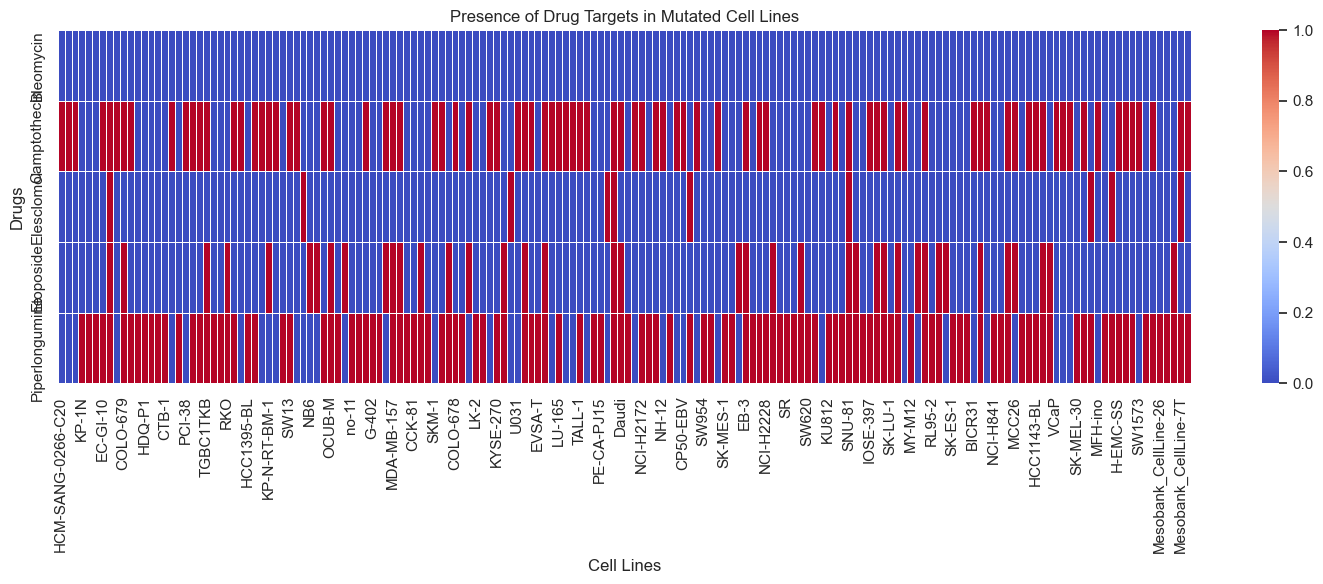

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your drug-target mapping
drug_to_targets = {
    'Bleomycin': ['DNA'],  
    'Camptothecin': ['TOP1', 'FUBP1'],  
    'Elesclomol': ['FDX1'], 
    'Etoposide': ['TOP2A'],  
    'Piperlongumine': ['TXNRD1', 'NR4A1', 'STAT3', 'TGFBR1'] 
}

# Step 1: Filter mutation data for only relevant genes
relevant_genes = set(g for targets in drug_to_targets.values() for g in targets)
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(relevant_genes)]

# Step 2: Build drug-cell line matrix
cell_lines = filtered_mutation_data['Cell_line'].unique()
drug_cell_matrix = pd.DataFrame(0, index=drug_to_targets.keys(), columns=cell_lines)

# Step 3: Populate matrix
for drug, targets in drug_to_targets.items():
    for gene in targets:
        cell_lines_with_gene = filtered_mutation_data[filtered_mutation_data['gene_symbol'] == gene]['Cell_line'].unique()
        drug_cell_matrix.loc[drug, cell_lines_with_gene] = 1

# Step 4: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(drug_cell_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Presence of Drug Targets in Mutated Cell Lines")
plt.xlabel("Cell Lines")
plt.ylabel("Drugs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Mutated_Cell_line in Urogenital_system.png", dpi=300)
plt.show()


C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_5516\1801970880.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')


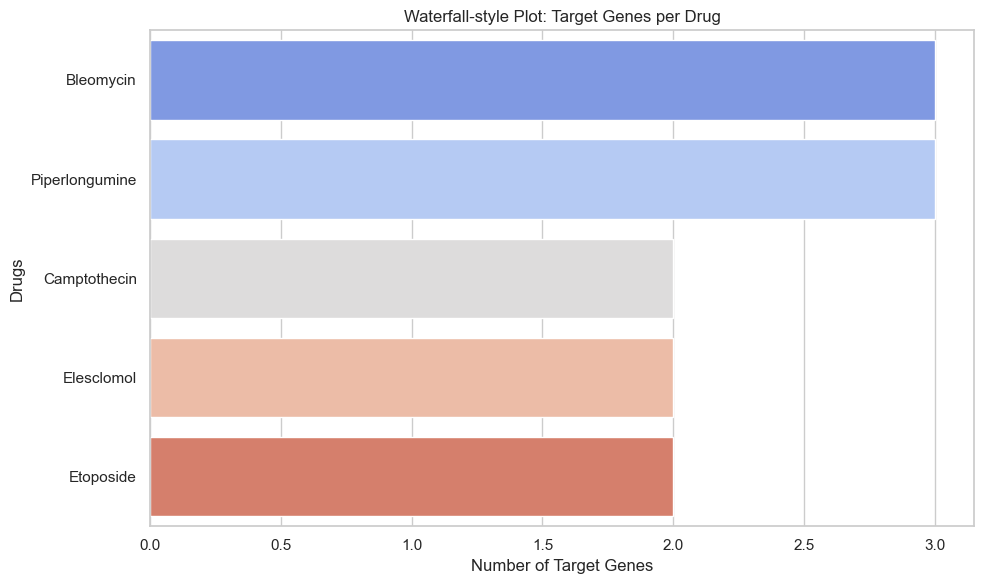

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Gene1': [1, 0, 1, 0, 1],
    'Gene2': [1, 1, 0, 0, 1],
    'Gene3': [0, 1, 1, 1, 0],
    'Gene4': [1, 0, 0, 1, 1]
}

# 5 drugs 
df = pd.DataFrame(data, index=[
    'Bleomycin',  
    'Camptothecin',  
    'Elesclomol', 
    'Etoposide',  
    'Piperlongumine'
])

# Waterfall-style: count of target genes per drug
drug_target_counts = df.sum(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')
plt.xlabel("Number of Target Genes")
plt.ylabel("Drugs")
plt.title("Waterfall-style Plot: Target Genes per Drug")
plt.tight_layout()
plt.savefig("waterfall_target_genes_per_drug in Urogenital_system.png", dpi=300)
plt.show()

In [18]:
import pandas as pd

# Expression data load karo
expr_df = pd.read_csv('rnaseq_all_20250117.csv', encoding="latin1")

# Gene symbol ko uppercase karo (matching ke liye)
expr_df['gene_symbol'] = expr_df['gene_symbol'].str.upper()

In [19]:
target_genes = [ 'NOTCH1', 'AR', 'ARID1A', 'MDM2', 'BRCA2', 'SMARCA4', 'ROS1', 'KRAS', 'FUBP1',
 'CDKN1A', 'ATP2A2', 'AKT1', 'BRCA1', 'SMARCB1', 'EZH2', 'LRRFIP2', 'JAK2', 'MYC',
 'PLK3', 'MAPK3', 'E2F7', 'TGFBR1', 'TXNRD1', 'RRM2B', 'NR4A1', 'TOP2B', 'XIAP',
 'HDAC2', 'TOP1', 'MAPK1', 'JAK1', 'PHLDA3', 'FDX1', 'TOP2A', 'PARP1', 'ID2',
 'DDB2', 'STAT3', 'PPM1D', 'TP53I3', 'DUSP14', 'BTG2', 'BCL2', 'H2AX', 'EI24',
 'HDAC1', 'GADD45A']

In [20]:
filtered_expr_df = expr_df[expr_df['gene_symbol'].isin(target_genes)]

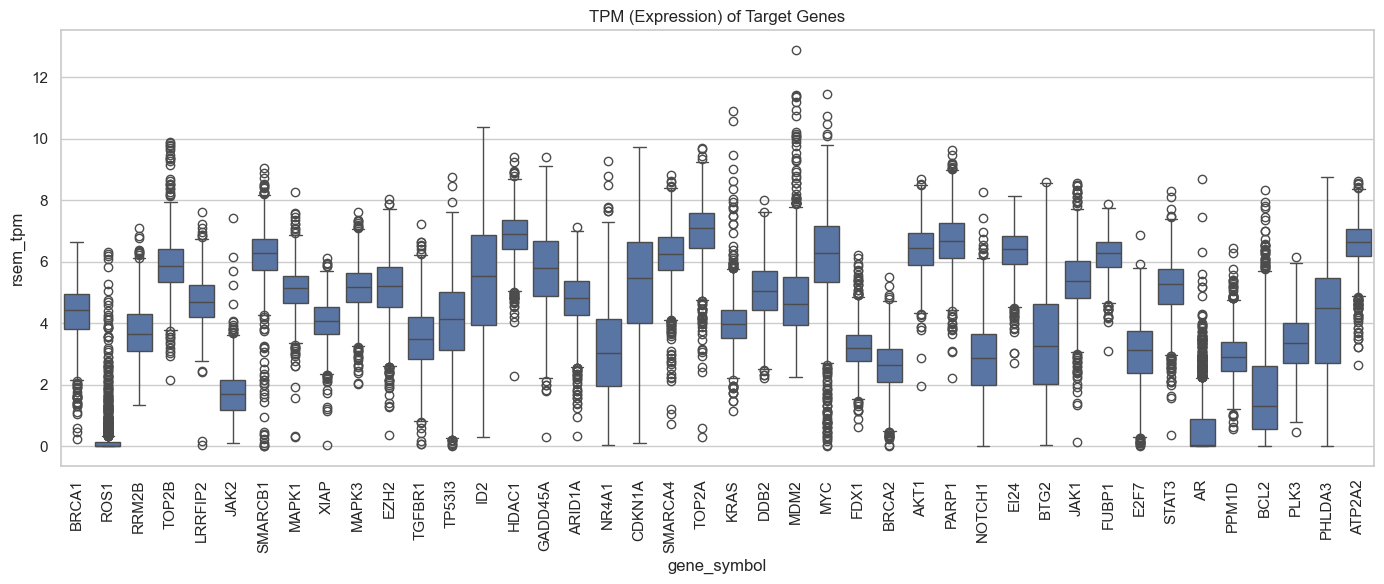

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for top genes 
plt.figure(figsize=(14, 6))
sns.boxplot(x='gene_symbol', y='rsem_tpm', data=filtered_expr_df)
plt.xticks(rotation=90)
plt.title('TPM (Expression) of Target Genes')
plt.ylabel('rsem_tpm')
plt.tight_layout()
plt.savefig("Gene_Expression of Top_selected_Drug in_Urogenital_system.png", dpi=300)
plt.show()